In [14]:
import pandas as pd
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from matplotlib import pylab
from sklearn.svm import LinearSVC
from sklearn.cross_validation import StratifiedKFold
from io import StringIO
import requests
import json
import numpy as np

np.random.seed(10) 

%matplotlib inline

In [2]:
# The code was removed by DSX for sharing.

,Material,Usura_mat_g,Durezza_Disco,CodPinza,Comprex_LP,Comprex_LR,Grindo_LP,Grindo_LR,PistoneCpx,Inerzia,Vmax,Area_pistone,CodImpianto,Raggio_medio,Disco
9482,9482,6.7,164,1,166,167,753,768,54,72.5,190,22.9,0,117.7,280x22
9799,9799,9.7,169,1,194,184,740,742,54,65.0,195,22.9,1,118.0,280X22
16136,16136,8.9,196,1,196,194,768,743,54,65.0,195,22.9,2,104.0,256X22
19269,19269,7.9,194,1,194,190,0,0,54,65.0,195,22.9,2,104.0,256X22
19269,19269,8.8,190,1,213,195,0,0,54,72.5,190,22.9,3,117.7,280x22


In [3]:

df_data_2 = pd.read_csv(get_object_storage_file_with_credentials_a860223228054eadb78455bad5266913('ITTProject', 'mapping.csv'), header = None)
df_data_2.head()


,0,1
0,10240,1
1,10241,1
2,10244,1
3,10246,1
4,24583,2


In [4]:

df_data_5 = pd.read_csv(get_object_storage_file_with_credentials_a860223228054eadb78455bad5266913('ITTProject', 'cleaned_materials.csv'), index_col = 'Unnamed: 0')
print df_data_5.shape
df_data_5.head()


(482, 193)


,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
8951,0.042246,-0.005937,0.027117,-0.001903,0.013791,-0.022353,0.063907,-0.023371,0.004564,-0.012443,...,0.000227,0.000112,0.000044,0.000041,-0.000015,-7.860875e-07,-0.000057,-0.000066,0.000062,0.000020
8997,0.027176,0.087921,-0.077450,0.032441,0.005934,0.029765,0.009249,0.004650,-0.003320,0.016842,...,-0.008613,-0.012683,0.004724,0.008423,0.006751,-1.920840e-03,-0.006889,-0.004928,-0.010872,-0.005499
9024,0.042246,-0.005937,0.027117,-0.001903,0.013791,-0.022353,0.063907,-0.023371,0.004564,-0.012443,...,0.000227,0.000112,0.000044,0.000041,-0.000015,-7.860875e-07,-0.000057,-0.000066,0.000062,0.000020
9043,0.052750,0.002831,0.037146,-0.011094,0.035755,-0.066244,0.203717,-0.099144,0.056779,-0.056352,...,-0.004587,-0.000884,-0.000036,-0.000659,-0.000442,-4.274769e-04,0.000617,0.000255,-0.000725,0.002245
9313,0.042074,-0.005888,0.026843,-0.001879,0.013626,-0.022069,0.063027,-0.023009,0.004487,-0.012187,...,-0.001677,-0.000871,-0.000362,-0.000424,0.000138,2.836292e-06,0.000862,0.001160,-0.001382,-0.000705


In [5]:

df_merged = df_data_1.join(df_data_5, how = 'right')
df_merged = df_merged.reset_index(drop=True)
for col in df_merged.columns:
    if df_merged[col].dtype != 'object':
        df_merged[col] = df_merged[col].fillna(df_merged[col].median())
    else:
        df_merged[col] = df_merged[col].fillna(df_merged[col].mode())
print df_merged.shape

(651, 208)


In [6]:
df_merged = df_merged.drop([str(i) for i in np.arange(0,193)], axis = 1)
df_merged.head()

,Material,Usura_mat_g,Durezza_Disco,CodPinza,Comprex_LP,Comprex_LR,Grindo_LP,Grindo_LR,PistoneCpx,Inerzia,Vmax,Area_pistone,CodImpianto,Raggio_medio,Disco
0,8951,15.2,165,1,182,182,810,813,54,65,195,22.9,1,118,280X22
1,8997,13.3,177,1,181,203,738,729,54,65,195,22.9,1,118,280X22
2,9024,7.5,235,1,125,136,727,731,54,65,195,22.9,1,118,280X22
3,9024,7.8,237,1,137,102,701,674,54,65,195,22.9,1,118,280X22
4,9043,10.9,180,1,196,201,820,805,54,65,195,22.9,1,118,280X22


In [7]:
#class_mappings = df_data_2.to_dict(orient='index')
import csv
with open('mapping.csv', mode='r') as infile:
    reader = csv.reader(infile)
    class_mappings = dict((str(rows[0]),rows[1]) for rows in reader)
print len(class_mappings)

482


In [8]:
df_merged['Material'] = df_merged['Material'].apply(lambda x : class_mappings[str(x)])

In [9]:
df_merged['Disco'] = df_merged['Disco'].apply(lambda x : x.lower())

In [10]:
df_merged['Disco'].unique()

array(['280x22', '256x22', '276x24'], dtype=object)

In [11]:
disco_dict = { '280x22' : 5.4 , '256x22' : 4.5, '276x24' : 5.7}
df_plot = df_merged.copy()
df_plot['Disco'] =  df_plot['Disco'].apply(lambda x : disco_dict[x])

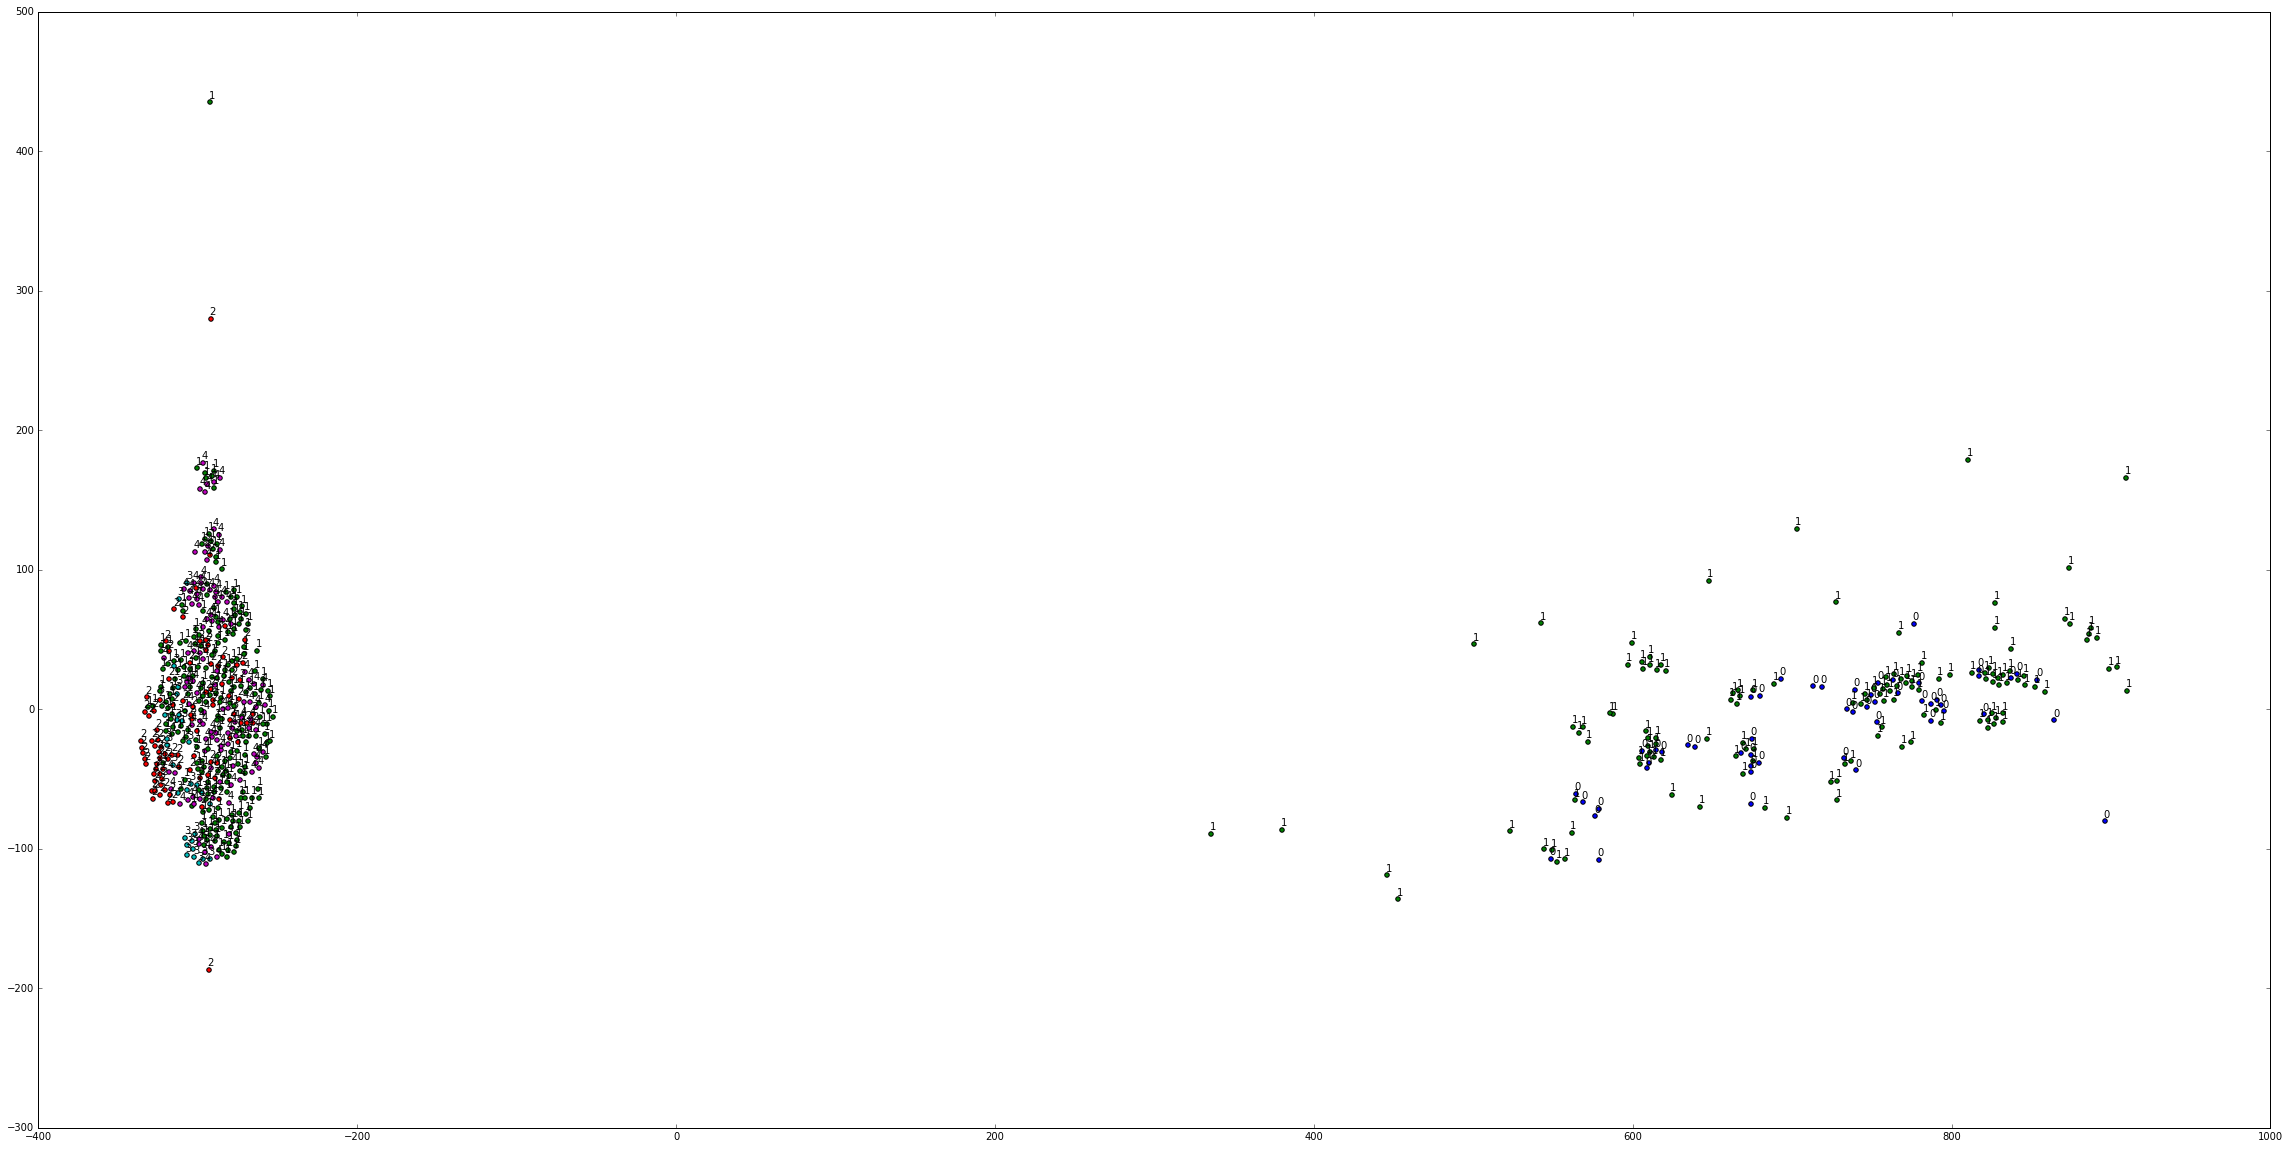

In [15]:
def plot_tsne(embeddings, labels, reduced):
    assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
    pylab.figure(figsize=(40,20)) # in inches
    dim_lab = len(set(labels))
    if reduced== True:
        color = ['b', 'g','r', 'c', 'm', 'y', 'k', 'w']
    for i, label in enumerate(labels):
        x, y = embeddings[i,:]
        if reduced == True:
            pylab.scatter(x, y, c= color[int(label)])
        else:
             pylab.scatter(x, y)
        pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    pylab.show()

tsne= TSNE(perplexity=30, n_components= 2, init='pca', n_iter= 5000)
transf_tsne = tsne.fit_transform(df_plot.drop('Material', axis = 1).values)
labels = df_plot['Material'].values
plot_tsne(transf_tsne, labels, True)